In [1]:
import numpy as np
import pandas as pd
import scipy.spatial as sp
import scipy.stats as st
from math import floor

import bokeh_catplot
import bokeh
import colorcet as cc
import holoviews as hv
import panel as pn

hv.extension('matplotlib')
bokeh.io.output_notebook()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

Loading BokehJS ...

In [2]:
%run lattice_signaling.py

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

All lattice_signaling.py functions imported.


In [3]:
%load_ext blackcellmagic

<hr>

Below are *non-dimensionalized* systems of equations describing induction of a signal $S$ from a sender cell $0$ with expression $S_0$ to $N$ other cells in a system, where the signal expression of cell $i$ is denoted $S_i$. The signal is activated by an inducer $I$, which in all cases will be absent until time $0$.

\begin{multline}
\shoveleft \frac{d I}{dt} = 0 \\
\shoveleft \frac{d S_0}{dt} = I - S_0 \\
\shoveleft \frac{d S_i}{dt} = \alpha \sum_j{\frac{S_j}{n_i}} - S_i \quad \forall\, \text{ neighbors $\{j\}$ of } i, \, \forall\, i \in {1, 2, ... N}\\
\end{multline}

where $\alpha$ is the dimensionless efficiency of signal transduction, $n_i$ is the number of neighbors $j$ of cell $i$ (equiv. $|\{j\}| = n_i$). The neighbors of cell $i$ are defined using graph adjacency notation such that

\begin{multline}
\shoveleft \{S_j\}_i = A \cdot (\vec{e_i} \cdot \vec{S}) \\
\shoveleft \{S_j\} = A \cdot \vec{S} \\
\end{multline}

where $A$ is the undirected adjacency matrix of the vector of cells $\vec{S} = [I, S_0, S_1, ... S_N]$ (nodes in the graph), and the unit vector $\vec{e_i}=[0, ... 1, ... 0], |\vec{e_i}| = N$ that is $1$ at element $i$ and $0$ everywhere else. 

For a 2D regular hexagonal lattice graph, all cells have $6$ neighbors, so $n_i = 6 \forall i$. The system of equations can be simplified.

\begin{multline}
\shoveleft \frac{d \vec{S}}{dt} = \frac{\alpha}{6} \left(A \cdot \vec{S}\right) - \vec{S} \\
\end{multline}

It can further be represented in matrix form.

\begin{multline}
\shoveleft \frac{d \vec{S}}{dt} = M \cdot \vec{S} \\
\shoveleft M = 
\begin{pmatrix}
0 &  0 & 0 & \cdots & 0\\
1 & -1 & 0 & \cdots & 0\\
0 & b & 0 & \cdots & 0\\
\end{pmatrix}
\end{multline}

### 2D single-gene induction with positive feedback

So far, we have been modeling the behavior of the transceiver circuit based on some simplifying assumptions. Now let's ask the design question, "Could we use positive feedback to create a circuit that causes a ring of activation of a particular radius?" We suspect that positive autoregulation might enable this.

Below are *non-dimensionalized* systems of equations that use a Hill function parameterized by $k_s$ and $p_s$ to represent the induction of signal expression by neighbors in the case of a 2D lattice of immobile, non-dividing cells. The signal protein additionally induces its own expression via positive autoregulation (PAR) represented by a Hill function with parameters $k_r$ and $p_r$.

\begin{multline}
\shoveleft \frac{d I}{dt} = 0 \\
\shoveleft \frac{d S_0}{dt} = I - S_0 \\
\shoveleft \frac{d S_i}{dt} = \alpha \cdot f\left(S_i, \, \bar{S_i}; \, k_s, p_s, k_r, p_r\right) - S_i \\
\shoveleft \bar{S_i} = \frac{A_{i,*} \cdot \vec{S}}{n} \\
\shoveleft \forall \; i \in \{1, 2, ... N\} \\
\end{multline}

where $f$ denotes an increasing function that integrates the action of two activators (self-signal and neighboring signal) at the same promoter and $A$ is the adjacency matrix of cells, each with expression $\vec{S}$. There are two candidates for $f$, OR logic and SUM logic.

\begin{multline}
\shoveleft \text{X_OR_Y}\left(S_i, \, \bar{S_i}; \, k_s, p_s, k_r, p_r\right) = \frac{\left(\frac{S_i}{k_r}\right)^{p_r} + \left(\frac{\bar{S_i}}{k_s}\right)^{p_s}}{1 + \left(\frac{S_i}{k_r}\right)^{p_r} + \left(\frac{\bar{S_i}}{k_s}\right)^{p_s}} \\[1em]
\shoveleft \text{X_SUM_Y}\left(S_i, \, \bar{S_i}; \, k_s, p_s, k_r, p_r\right) = \frac{1}{2}\left( \frac{\left(\frac{S_i}{k_r}\right)^{p_r}}{1 + \left(\frac{S_i}{k_r}\right)^{p_r}} + \frac{\left(\frac{\bar{S_i}}{k_s}\right)^{p_s}}{1 + \left(\frac{\bar{S_i}}{k_s}\right)^{p_s}} \right) \\
\end{multline}

Of these 3, AND logic seems like it makes the least sense. For signals to propagate, lateral signaling must be sufficient by itself to activate the next transceiver. Nonetheless, I'll include it in my first plot to illustrate this, but afterwards I will test out how the system behaves using only OR vs. SUM logic. Let's plot the 

<hr>

Let's start with a Hello World.

:Layout
   .NdOverlay.I   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.II  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.III :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
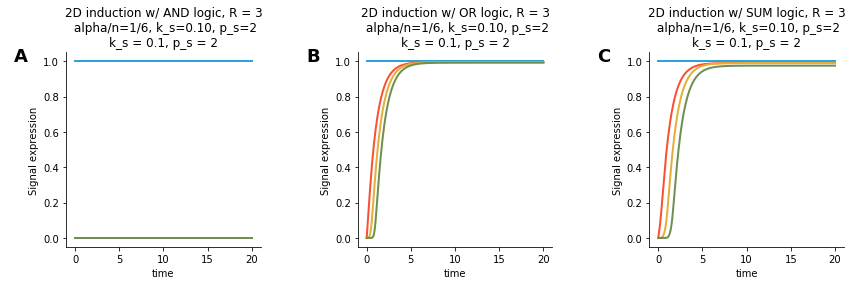

In [6]:
# System parameters
R = 3
alpha = 1
n = 6
k_s = 0.1
p_s = 2
k_r = 0.1
p_r = 2

# Simulation parameters
dt = 0.1
steps = 200

# Run simulations and plot results
plots = []
for logic in ('AND', 'OR', 'SUM'):
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plots.append(hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
        title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s}\nk_s = {k_s}, p_s = {p_s}'
    ).overlay().opts(show_legend=False))

hv.Layout(plots).cols(3)

<hr>

Let's see how OR logic performs

In [7]:
# Set system parameters
R = 10
alpha = 1
n = 6
k_s = 0.5
p_s = 2
p_r = 2
logic="OR"

# Simulation parameters
dt = 0.1
steps = 200

# Run simulations and plot results
plots = []
for k_r in np.linspace(0.1, 0.7, 12):
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plots.append(hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
        title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s}\nk_r = {k_r:.2f}, p_r = {p_r}'
    ).overlay().opts(show_legend=False))



:Layout
   .NdOverlay.I    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.II   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.III  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IV   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.V    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VIII :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IX   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.X    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
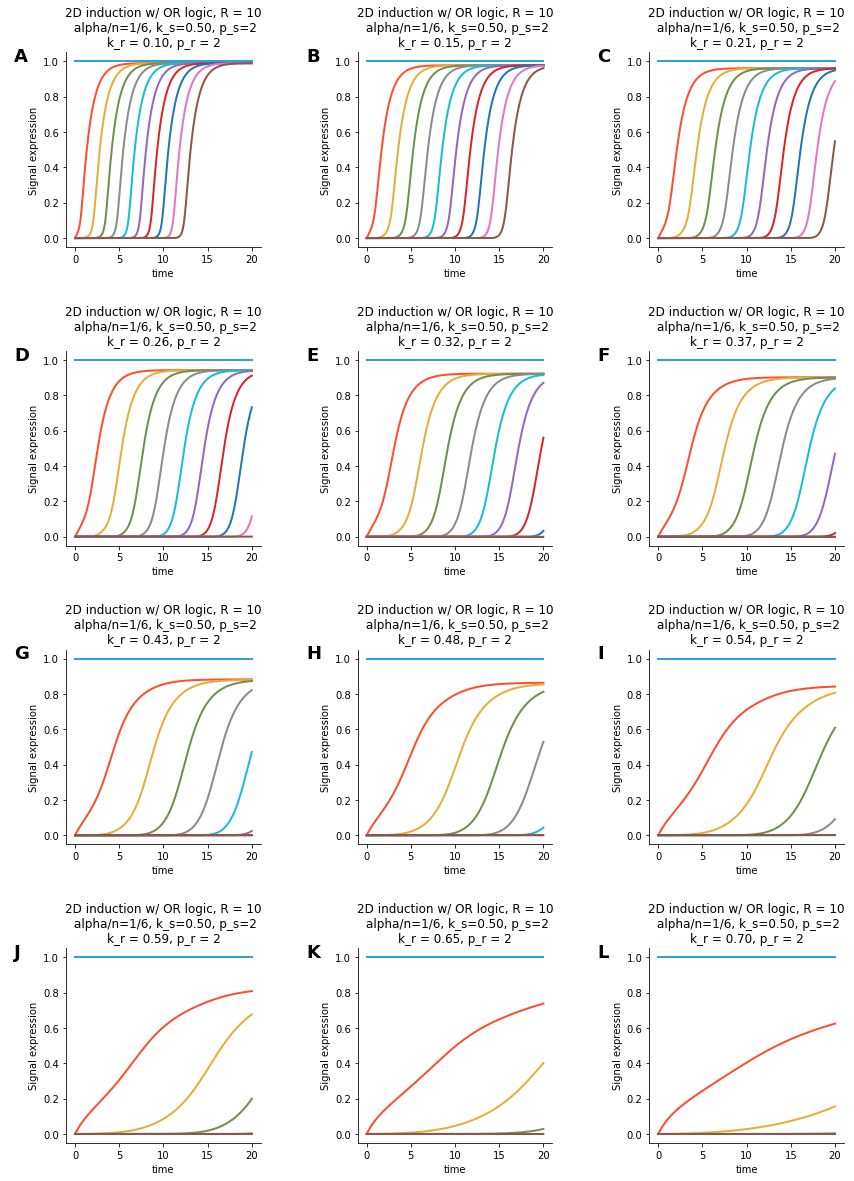

In [8]:
hv.Layout(plots).opts(vspace=0.5,).cols(3)

In [9]:
# Set system parameters
R = 10
alpha = 1
n = 6
p_s = 2
k_r = 0.1
p_r = 2
logic="OR"

# Simulation parameters
dt = 0.1
steps = 200

# Run simulations and plot results
plots = []
for k_s in np.linspace(0.1, 0.7, 12):
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plots.append(hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
        title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s}\nk_r = {k_r}, p_r = {p_r}'
    ).overlay().opts(show_legend=False))

:Layout
   .NdOverlay.I    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.II   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.III  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IV   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.V    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VIII :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IX   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.X    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
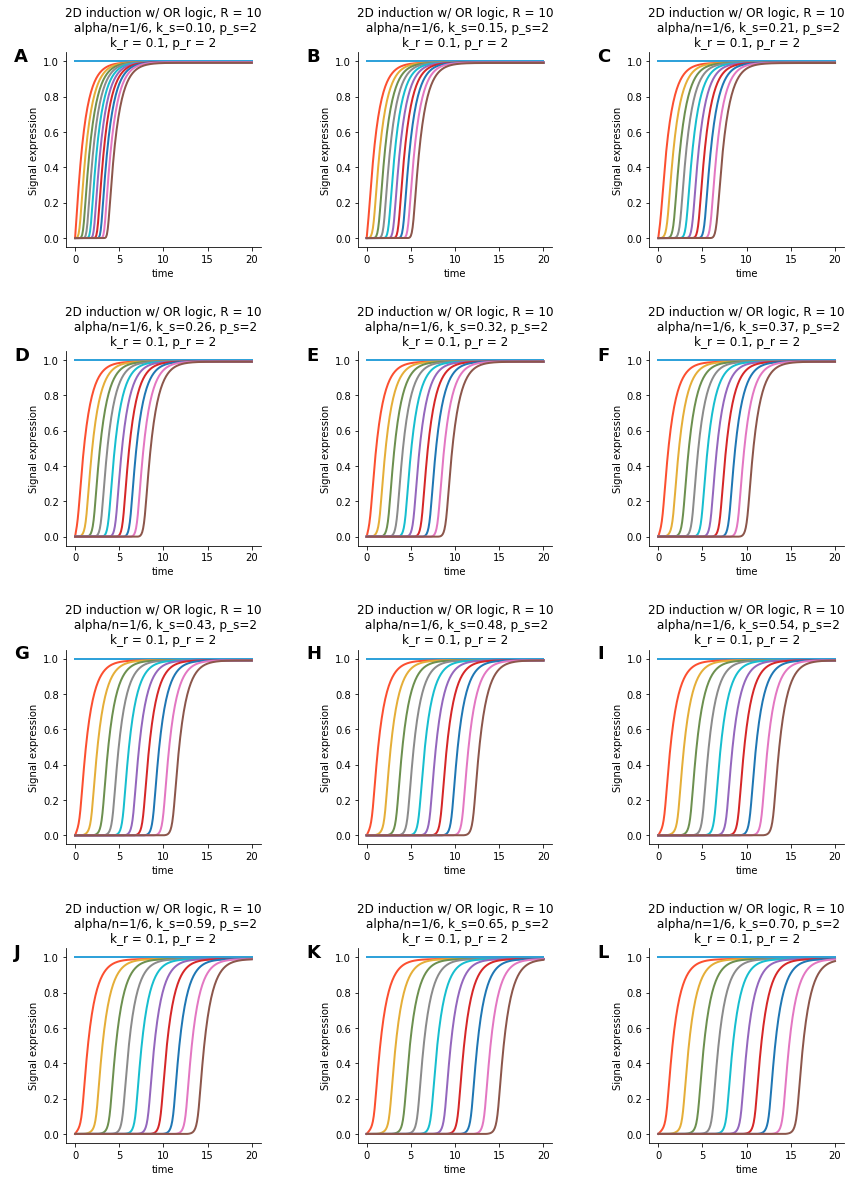

In [10]:
hv.Layout(plots).opts(vspace=0.5,).cols(3)

In [11]:
# Set system parameters
R = 10
alpha = 1
n = 6
p_s = 2
k_r = 0.5
p_r = 2
logic="OR"

# Simulation parameters
dt = 0.1
steps = 200

# Run simulations and plot results
plots = []
for k_s in np.linspace(0.1, 0.7, 12):
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plots.append(hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
        title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s}\nk_r = {k_r}, p_r = {p_r}'
    ).overlay().opts(show_legend=False))

:Layout
   .NdOverlay.I    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.II   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.III  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IV   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.V    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VIII :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IX   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.X    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
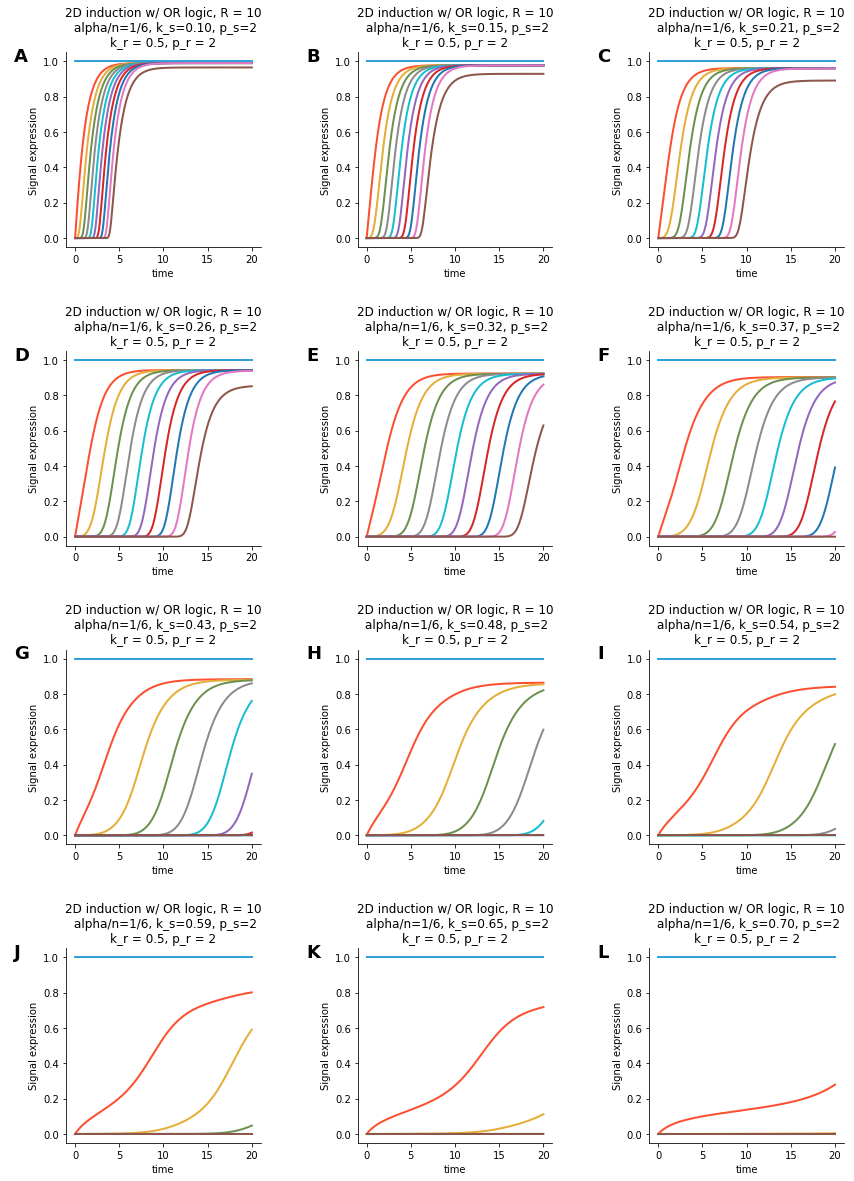

In [12]:
hv.Layout(plots).opts(vspace=0.5,).cols(3)

In [13]:
# Set system parameters
R = 10
alpha = 1
n = 6
k_s = 0.5
p_s = 2
k_r = 0.2
logic="OR"

# Simulation parameters
dt = 0.1
steps = 200

# Run simulations and plot results
plots = []
for p_r in np.linspace(1, 12, 12):
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plots.append(hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
        title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s}\nk_r = {k_r}, p_r = {p_r}'
    ).overlay().opts(show_legend=False))

:Layout
   .NdOverlay.I    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.II   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.III  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IV   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.V    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VIII :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IX   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.X    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
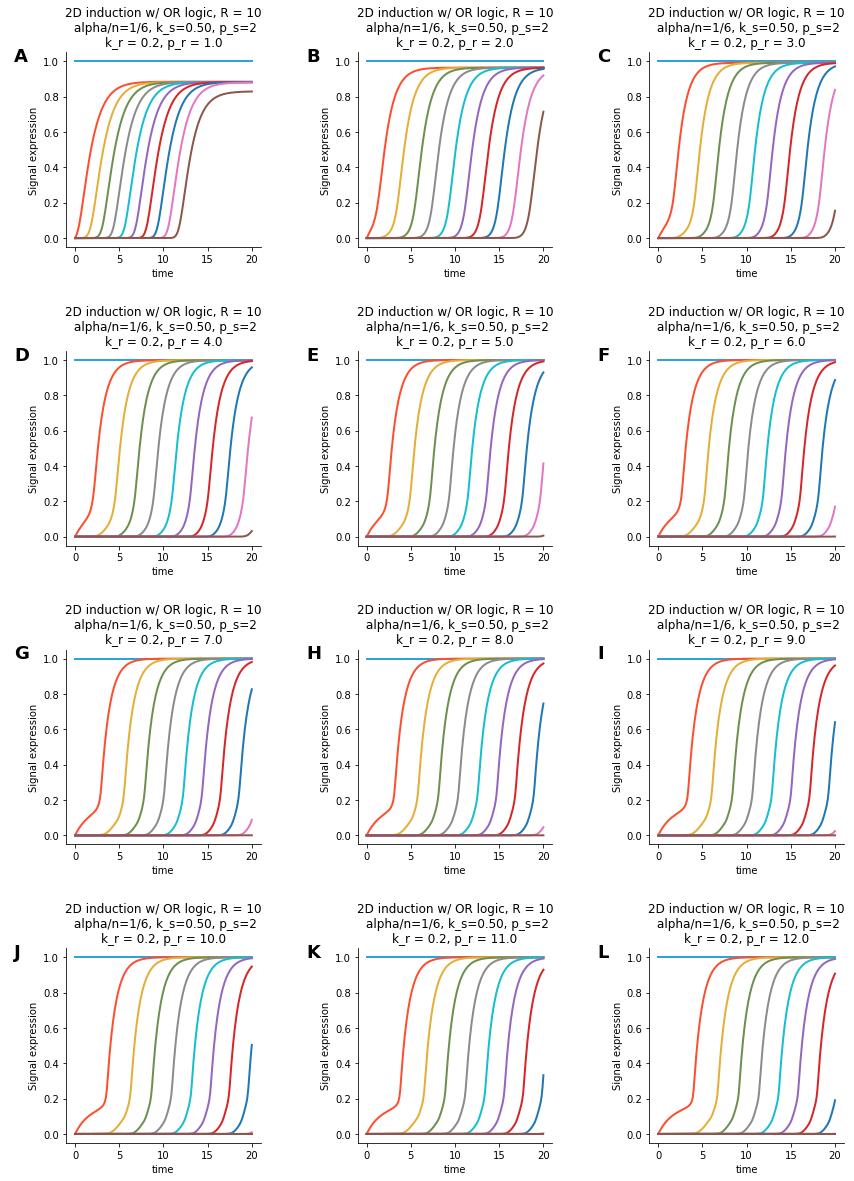

In [14]:
hv.Layout(plots).opts(vspace=0.5,).cols(3)

Higher $p_r$ seems to increase the response time asymptotically to a step-like limit, but the marginal effect is almost unnoticeable for $p_r>2$.

<hr>

Now let's do the same for SUM logic

In [15]:
# Set system parameters
R = 10
alpha = 1
n = 6
k_s = 0.5
p_s = 2
p_r = 2
logic="SUM"

# Run simulations and plot results
plots = []
for k_r in np.linspace(0.1, 0.7, 12):
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plots.append(hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
        title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s}\nk_r = {k_r:.2f}, p_r = {p_r}'
    ).overlay().opts(show_legend=False))



:Layout
   .NdOverlay.I    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.II   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.III  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IV   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.V    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VIII :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IX   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.X    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
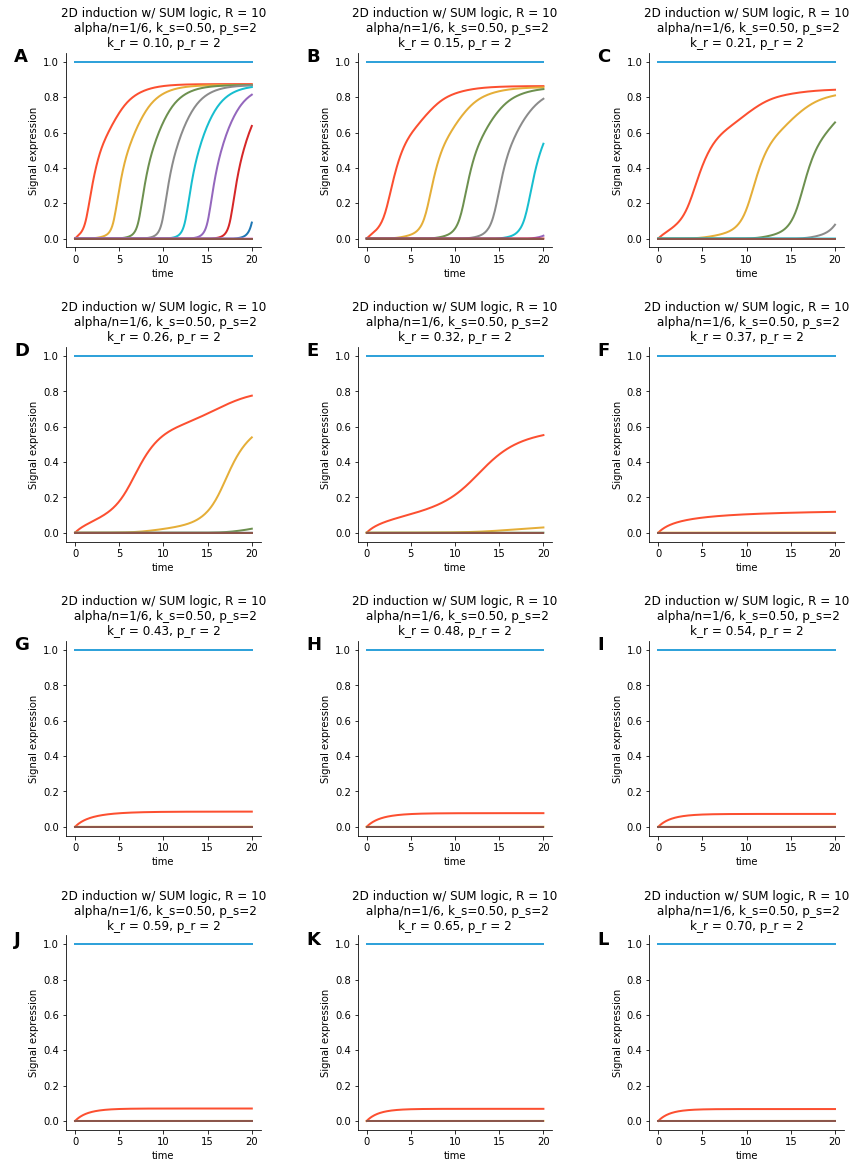

In [16]:
hv.Layout(plots).opts(vspace=0.5,).cols(3)

In [17]:
# Set system parameters
R = 10
alpha = 1
n = 6
p_s = 2
k_r = 0.1
p_r = 2
logic="SUM"

# Run simulations and plot results
plots = []
for k_s in np.linspace(0.1, 0.7, 12):
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plots.append(hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
        title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s}\nk_r = {k_r}, p_r = {p_r}'
    ).overlay().opts(show_legend=False))

:Layout
   .NdOverlay.I    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.II   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.III  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IV   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.V    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VIII :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IX   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.X    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
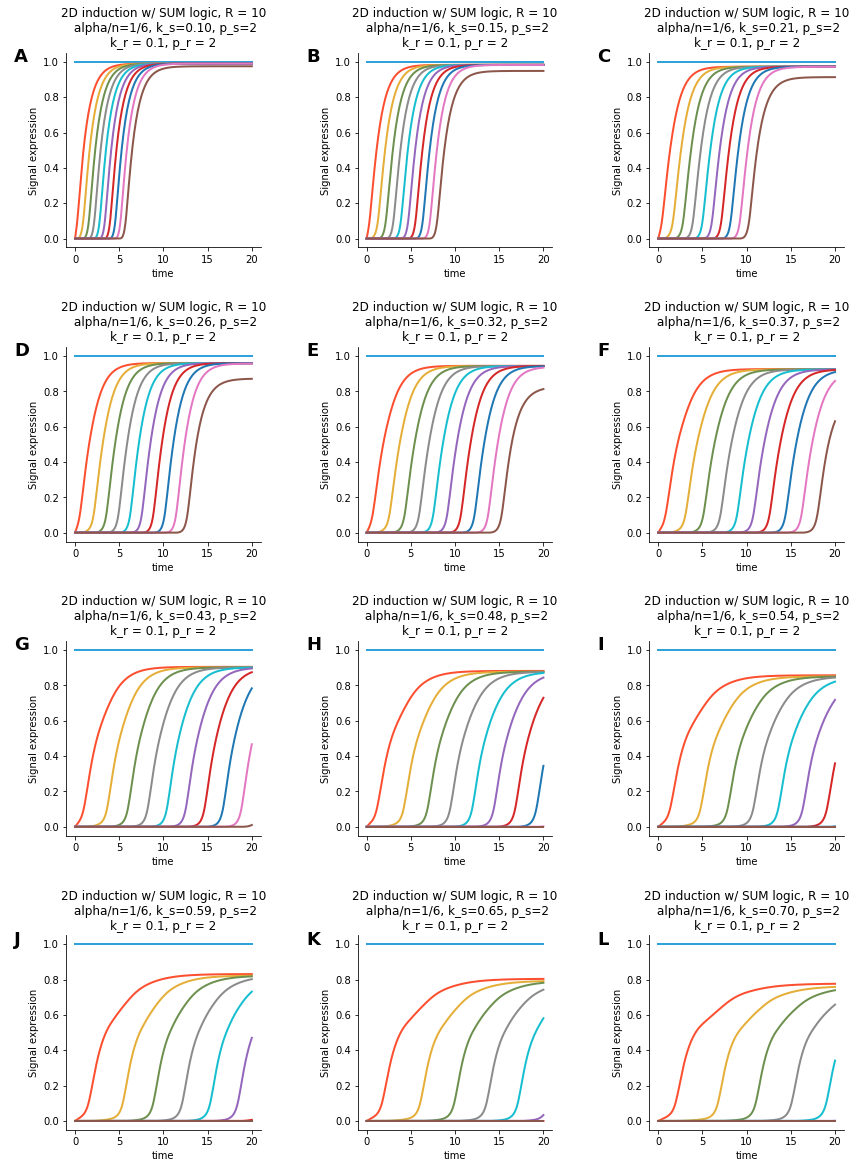

In [18]:
hv.Layout(plots).opts(vspace=0.5,).cols(3)

In [19]:
# Set system parameters
R = 10
alpha = 1
n = 6
p_s = 2
k_r = 0.5
p_r = 2
logic="SUM"

# Run simulations and plot results
plots = []
for k_s in np.linspace(0.1, 0.7, 12):
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plots.append(hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
        title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s}\nk_r = {k_r}, p_r = {p_r}'
    ).overlay().opts(show_legend=False))

:Layout
   .NdOverlay.I    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.II   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.III  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IV   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.V    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VIII :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IX   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.X    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
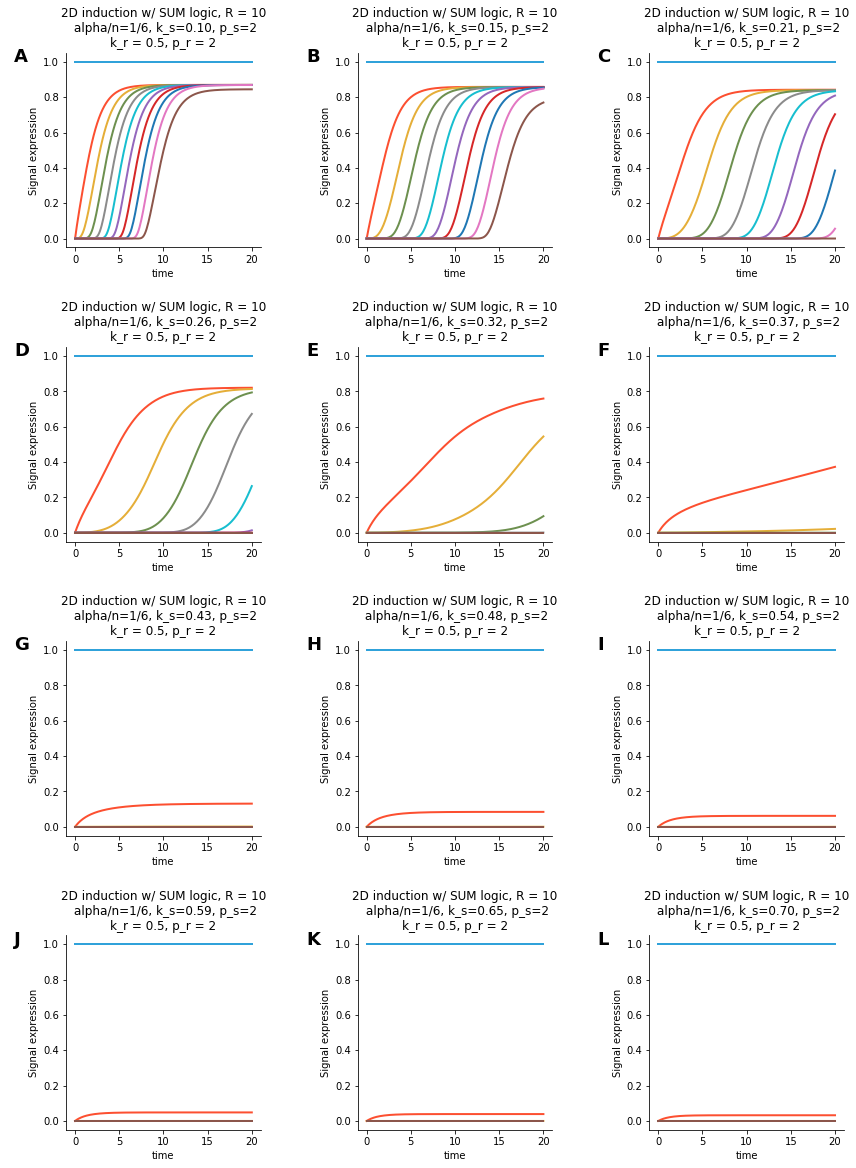

In [20]:
hv.Layout(plots).opts(vspace=0.5,).cols(3)

Here we see a sharp boundary between propagation and attenuation phenotypes as k_s crosses from 0.2 to 0.4. See discussion at the end.

In [21]:
# Set system parameters
R = 10
alpha = 1
n = 6
k_s = 0.5
p_s = 2
k_r = 0.2
logic="SUM"

# Run simulations and plot results
plots = []
for p_r in np.linspace(1, 6, 12):
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plots.append(hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
        title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s}\nk_r = {k_r}, p_r = {p_r:.2f}'
    ).overlay().opts(show_legend=False))

:Layout
   .NdOverlay.I    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.II   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.III  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IV   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.V    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VIII :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IX   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.X    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
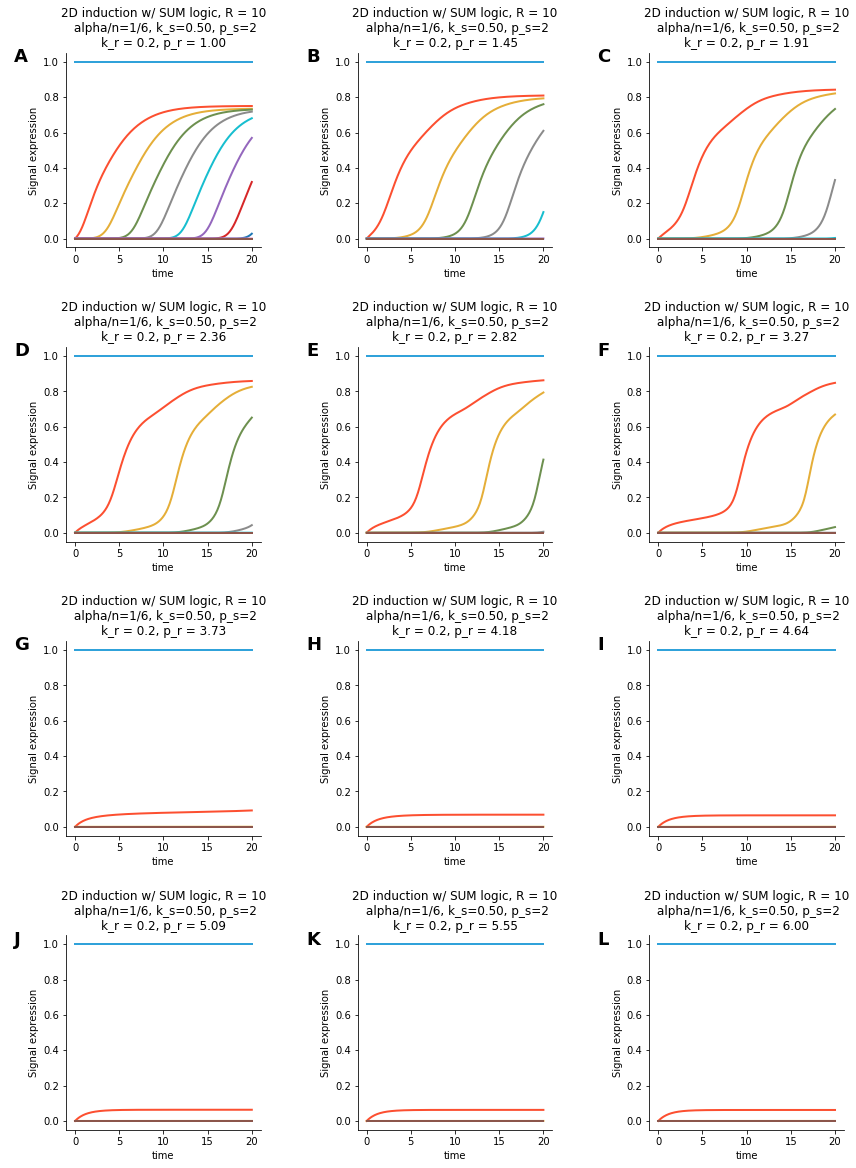

In [22]:
hv.Layout(plots).opts(vspace=0.5,).cols(3)

In [23]:
# Set system parameters
R = 10
alpha = 1
n = 6
k_s = 0.5
p_s = 2
k_r = 0.18
logic="SUM"

# Run simulations and plot results
plots = []
for p_r in np.linspace(1, 6, 12):
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plots.append(hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
        title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s}\nk_r = {k_r}, p_r = {p_r}'
    ).overlay().opts(show_legend=False))

:Layout
   .NdOverlay.I    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.II   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.III  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IV   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.V    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VIII :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IX   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.X    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
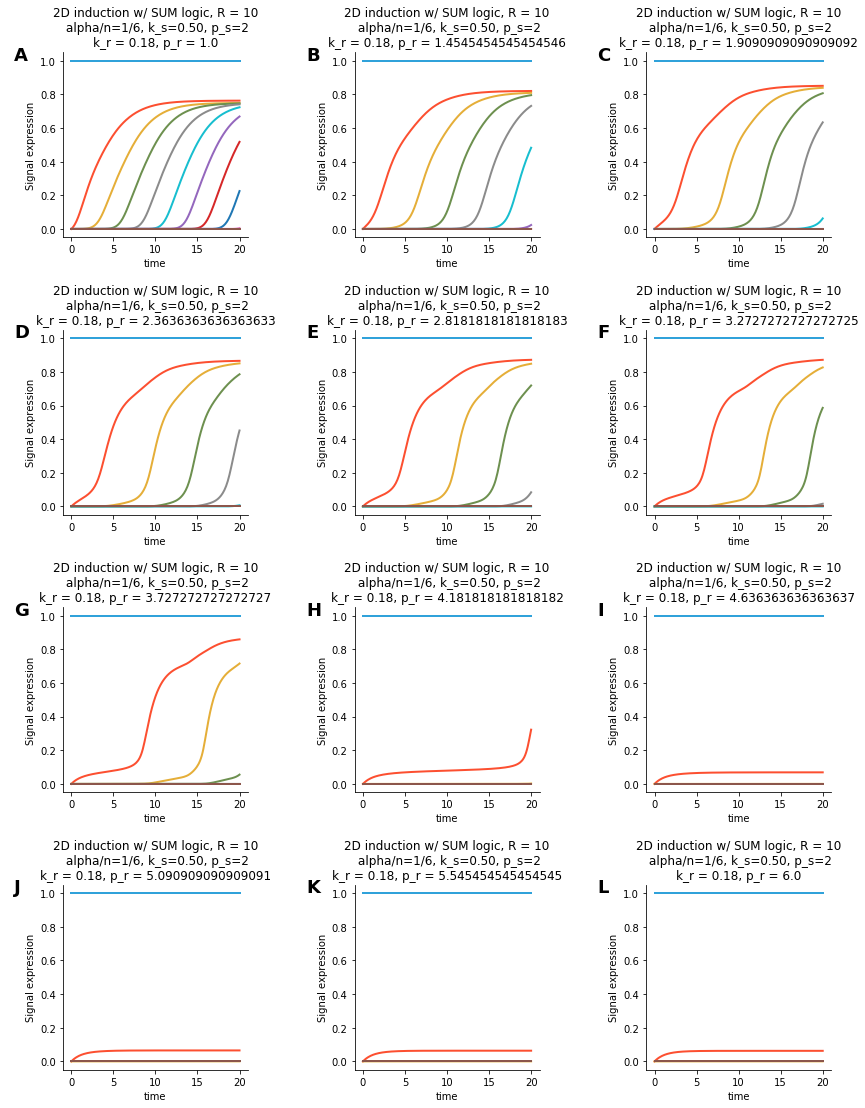

In [24]:
hv.Layout(plots).opts(vspace=0.5,).cols(3)

Below I'm seeing if a lower alpha makes spatial attenuation happen, but it doesn't.

In [25]:
# Set system parameters
R = 10
alpha = 0.5
n = 6
k_s = 0.3
p_s = 2
k_r = 0.18
logic="SUM"

# Run simulations and plot results
plots = []
for p_r in np.linspace(1, 6, 6):
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plots.append(hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
        title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False))

:Layout
   .NdOverlay.I   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.II  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.III :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IV  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.V   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VI  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
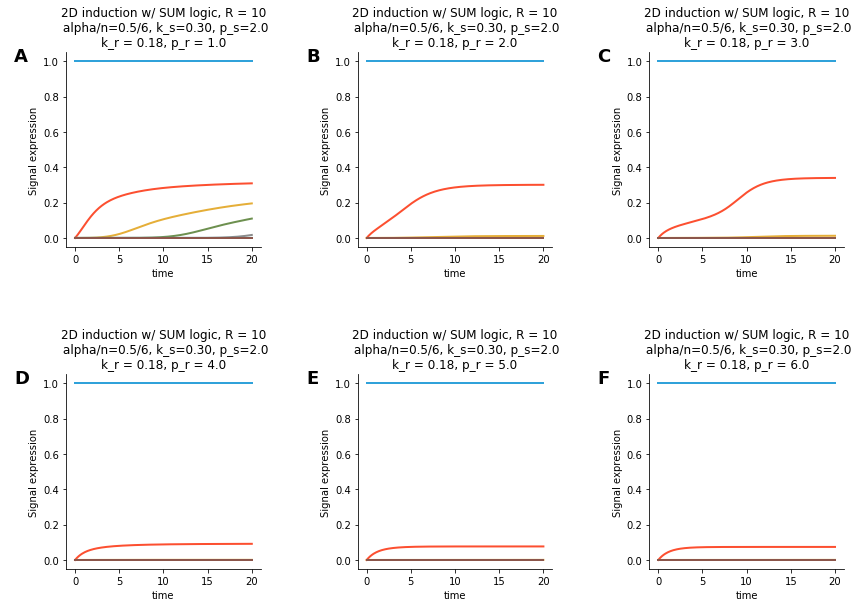

In [26]:
hv.Layout(plots).opts(vspace=0.5,).cols(3)

In [27]:
# Set system parameters
R = 10
n = 6
k_s = 0.5
p_s = 2
k_r = 0.3
p_r = 2
logic="SUM"

# Run simulations and plot results
plots = []
for alpha in np.linspace(1, 3, 12):
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plots.append(hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
        title=f"""2D induction w/ {logic} logic, R = {R}
alpha/n={alpha:.2f}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}
k_r = {k_r:.2f}, p_r = {p_r:.1f}"""
    ).overlay().opts(show_legend=False))

:Layout
   .NdOverlay.I    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.II   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.III  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IV   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.V    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.VIII :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.IX   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.X    :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XI   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
   .NdOverlay.XII  :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
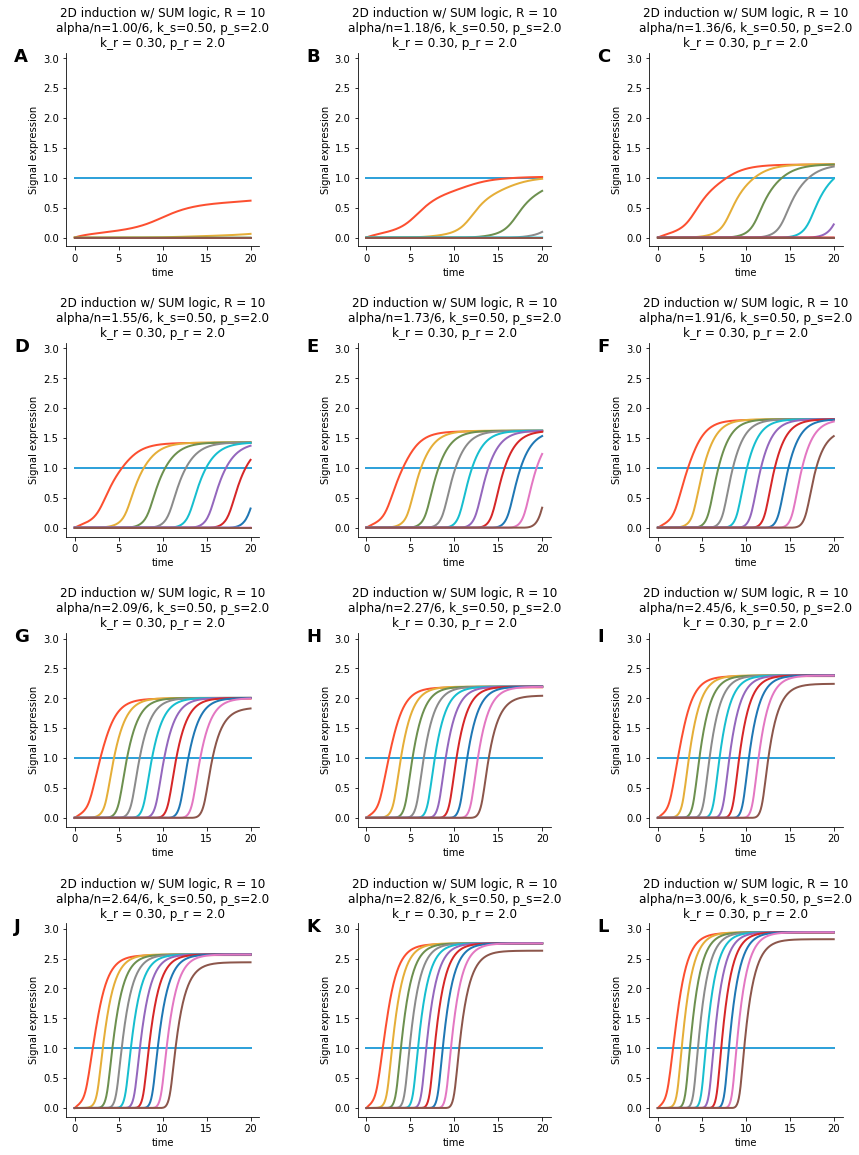

In [28]:
hv.Layout(plots).opts(vspace=0.5,).cols(3)

In [45]:
def plot_axis_curve(k_s, k_r, more_params):
    # Re-pack params
    R, alpha, n, p_s, p_r, logic, steps, dt, I_0 = more_params
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plt = hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
#         title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False)
    
    return plt

# Set system parameters
R = 10
alpha = 1
n = 6
p_s = 2
p_r = 2
logic="SUM"
I_0 = 1

# Run simulations and plot results
more_params = R, alpha, n, p_s, p_r, logic, steps, dt, I_0

k_s_vals = np.linspace(0.1, 0.7, 7)
k_r_vals = np.linspace(0.1, 0.7, 7)

curve_dict_2D = {
    (ks, kr): plot_axis_curve(ks, kr, more_params)
    for ks in k_s_vals
    for kr in k_r_vals
}

:GridSpace   [Signaling threshold,PAR threshold]
   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
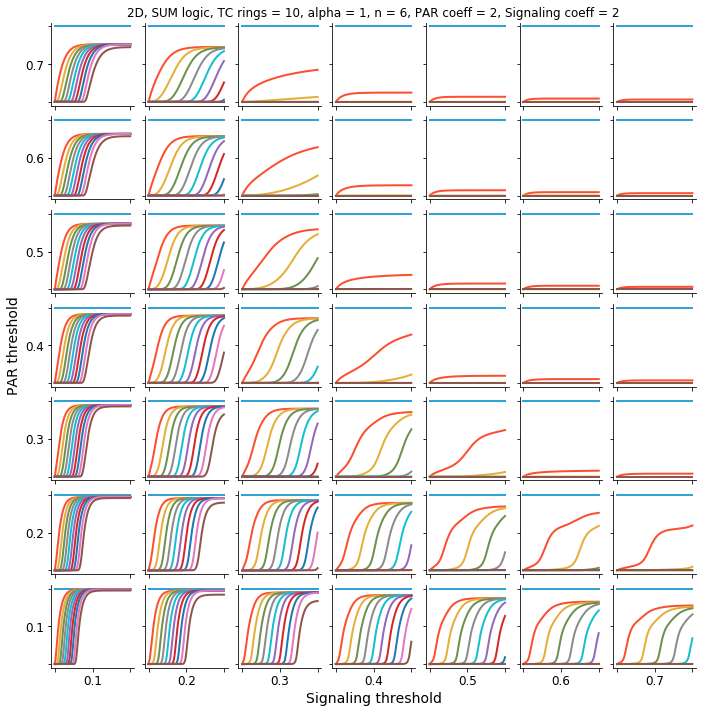

In [47]:
gridspace = hv.GridSpace(
    curve_dict_2D, kdims=["Signaling threshold", "PAR threshold"]
).opts(
    fig_inches=8,
    fontsize=dict(labels=14, ticks=12),
    title=f"2D, {logic} logic, TC rings = {R}, alpha = {alpha}, n = {n}, PAR coeff = {p_r}, Signaling coeff = {p_s}",
)
hv.output(gridspace)

In [48]:
def plot_axis_curve(k_s, k_r, more_params):
    # Re-pack params
    R, alpha, n, p_s, p_r, logic, steps, dt, I_0 = more_params
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plt = hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
#         title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False)
    
    return plt

# Set system parameters
R = 10
alpha = 1.5
n = 6
p_s = 2
p_r = 2
logic="SUM"
I_0 = 1

# Run simulations and plot results
more_params = R, alpha, n, p_s, p_r, logic, steps, dt, I_0

k_s_vals = np.linspace(0.1, 0.7, 7)
k_r_vals = np.linspace(0.1, 0.7, 7)

curve_dict_2D = {
    (ks, kr): plot_axis_curve(ks, kr, more_params)
    for ks in k_s_vals
    for kr in k_r_vals
}

:GridSpace   [Signaling threshold,PAR threshold]
   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
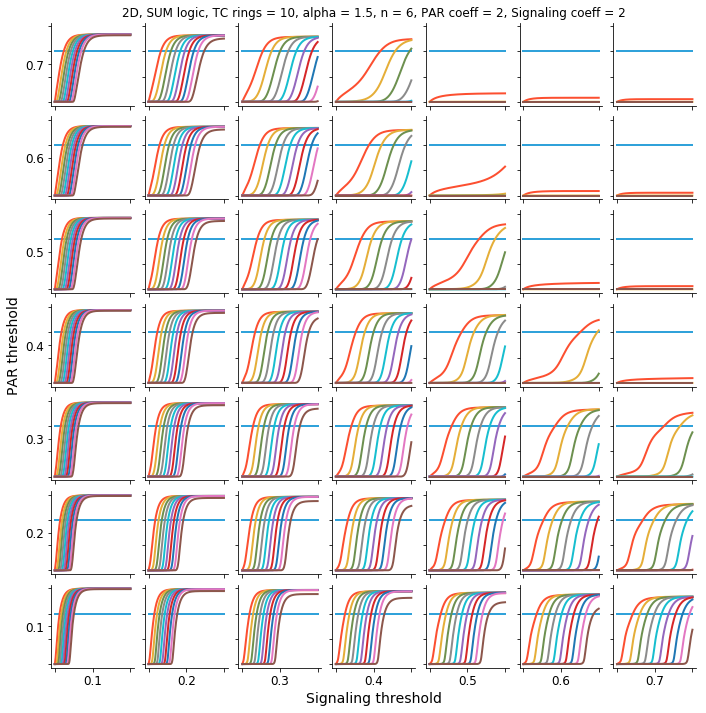

In [49]:
gridspace = hv.GridSpace(
    curve_dict_2D, kdims=["Signaling threshold", "PAR threshold"]
).opts(
    fig_inches=8,
    fontsize=dict(labels=14, ticks=12),
    title=f"2D, {logic} logic, TC rings = {R}, alpha = {alpha}, n = {n}, PAR coeff = {p_r}, Signaling coeff = {p_s}",
)
hv.output(gridspace)

In [50]:
def plot_axis_curve(k_s, k_r, more_params):
    # Re-pack params
    R, alpha, n, p_s, p_r, logic, steps, dt, I_0 = more_params
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plt = hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
#         title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False)
    
    return plt

# Set system parameters
R = 10
alpha = 2
n = 6
p_s = 2
p_r = 2
logic="SUM"
I_0 = 1

# Run simulations and plot results
more_params = R, alpha, n, p_s, p_r, logic, steps, dt, I_0

k_s_vals = np.linspace(0.1, 0.7, 7)
k_r_vals = np.linspace(0.1, 0.7, 7)

curve_dict_2D = {
    (ks, kr): plot_axis_curve(ks, kr, more_params)
    for ks in k_s_vals
    for kr in k_r_vals
}

:GridSpace   [Signaling threshold,PAR threshold]
   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
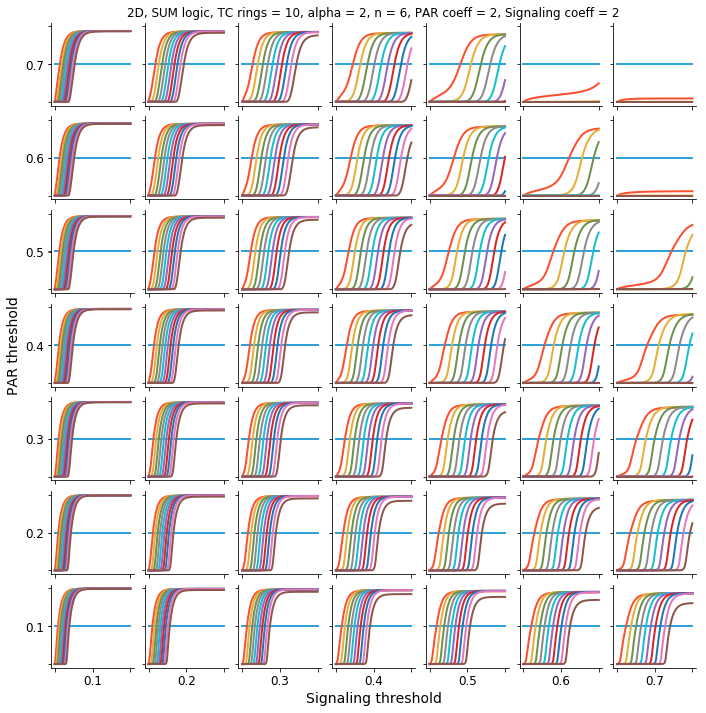

In [51]:
gridspace = hv.GridSpace(
    curve_dict_2D, kdims=["Signaling threshold", "PAR threshold"]
).opts(
    fig_inches=8,
    fontsize=dict(labels=14, ticks=12),
    title=f"2D, {logic} logic, TC rings = {R}, alpha = {alpha}, n = {n}, PAR coeff = {p_r}, Signaling coeff = {p_s}",
)
hv.output(gridspace)

In [52]:
def plot_axis_curve(k_s, k_r, more_params):
    # Re-pack params
    R, alpha, n, p_s, p_r, logic, steps, dt, I_0 = more_params
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plt = hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
#         title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False)
    
    return plt

# Set system parameters
R = 10
alpha = 0.5
n = 6
p_s = 2
p_r = 2
logic="SUM"
I_0 = 1

# Run simulations and plot results
more_params = R, alpha, n, p_s, p_r, logic, steps, dt, I_0

k_s_vals = np.linspace(0.1, 0.7, 7)
k_r_vals = np.linspace(0.1, 0.7, 7)

curve_dict_2D = {
    (ks, kr): plot_axis_curve(ks, kr, more_params)
    for ks in k_s_vals
    for kr in k_r_vals
}

:GridSpace   [Signaling threshold,PAR threshold]
   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
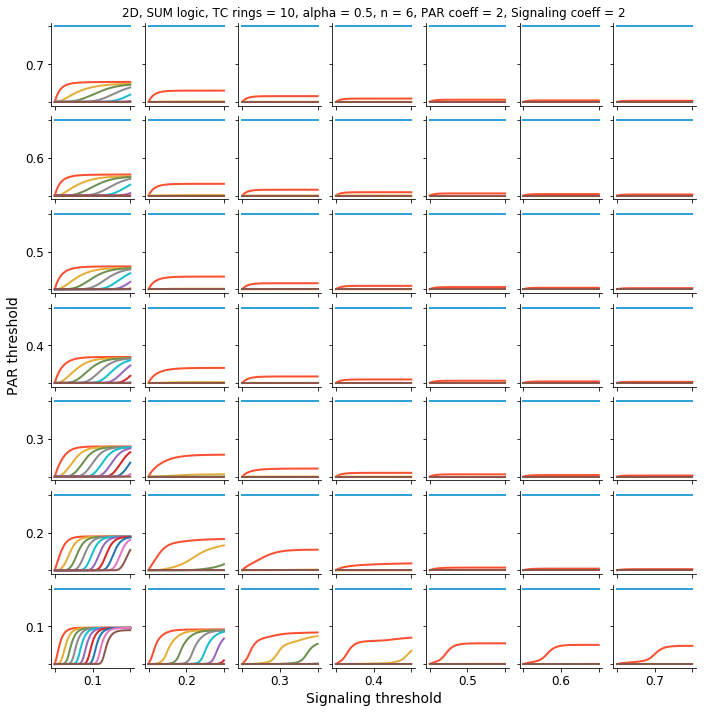

In [53]:
gridspace = hv.GridSpace(
    curve_dict_2D, kdims=["Signaling threshold", "PAR threshold"]
).opts(
    fig_inches=8,
    fontsize=dict(labels=14, ticks=12),
    title=f"2D, {logic} logic, TC rings = {R}, alpha = {alpha}, n = {n}, PAR coeff = {p_r}, Signaling coeff = {p_s}",
)
hv.output(gridspace)

In [54]:
def plot_axis_curve(k_s, k_r, more_params):
    # Re-pack params
    R, alpha, n, p_s, p_r, logic, steps, dt, I_0 = more_params
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plt = hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
#         title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False)
    
    return plt

# Set system parameters
R = 10
alpha = 1
n = 6
p_s = 4
p_r = 4
logic="SUM"
I_0 = 1

# Run simulations and plot results
more_params = R, alpha, n, p_s, p_r, logic, steps, dt, I_0

k_s_vals = np.linspace(0.1, 0.7, 7)
k_r_vals = np.linspace(0.1, 0.7, 7)

curve_dict_2D = {
    (ks, kr): plot_axis_curve(ks, kr, more_params)
    for ks in k_s_vals
    for kr in k_r_vals
}

:GridSpace   [Signaling threshold,PAR threshold]
   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
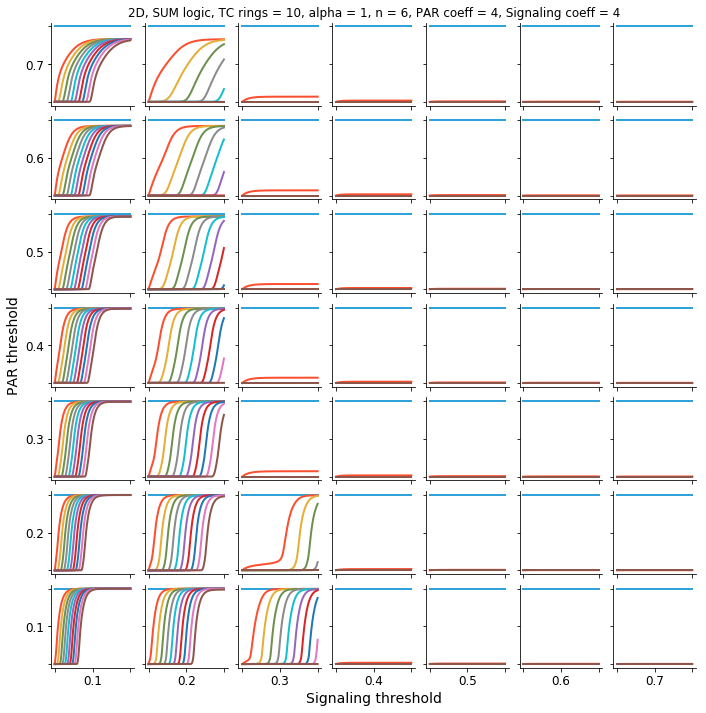

In [55]:
gridspace = hv.GridSpace(
    curve_dict_2D, kdims=["Signaling threshold", "PAR threshold"]
).opts(
    fig_inches=8,
    fontsize=dict(labels=14, ticks=12),
    title=f"2D, {logic} logic, TC rings = {R}, alpha = {alpha}, n = {n}, PAR coeff = {p_r}, Signaling coeff = {p_s}",
)
hv.output(gridspace)

In [56]:
def plot_axis_curve(k_s, k_r, more_params):
    # Re-pack params
    R, alpha, n, p_s, p_r, logic, steps, dt, I_0 = more_params
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plt = hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
#         title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False)
    
    return plt

# Set system parameters
R = 10
alpha = 1
n = 6
p_s = 4
p_r = 2
logic="SUM"
I_0 = 1

# Run simulations and plot results
more_params = R, alpha, n, p_s, p_r, logic, steps, dt, I_0

k_s_vals = np.linspace(0.1, 0.7, 7)
k_r_vals = np.linspace(0.1, 0.7, 7)

curve_dict_2D = {
    (ks, kr): plot_axis_curve(ks, kr, more_params)
    for ks in k_s_vals
    for kr in k_r_vals
}

:GridSpace   [Signaling threshold,PAR threshold]
   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
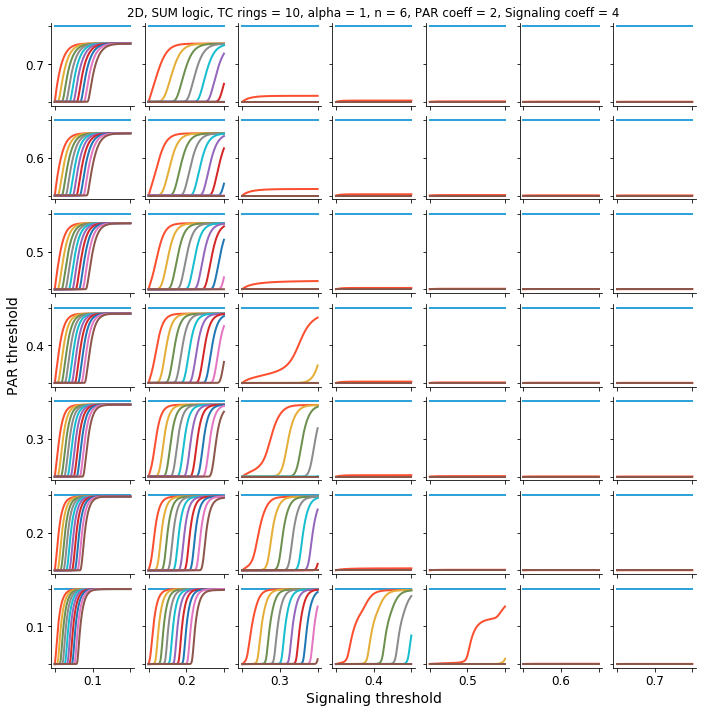

In [57]:
gridspace = hv.GridSpace(
    curve_dict_2D, kdims=["Signaling threshold", "PAR threshold"]
).opts(
    fig_inches=8,
    fontsize=dict(labels=14, ticks=12),
    title=f"2D, {logic} logic, TC rings = {R}, alpha = {alpha}, n = {n}, PAR coeff = {p_r}, Signaling coeff = {p_s}",
)
hv.output(gridspace)

In [58]:
def plot_axis_curve(k_s, k_r, more_params):
    # Re-pack params
    R, alpha, n, p_s, p_r, logic, steps, dt, I_0 = more_params
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plt = hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
#         title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False)
    
    return plt

# Set system parameters
R = 10
alpha = 1
n = 6
p_s = 2
p_r = 4
logic="SUM"
I_0 = 1

# Run simulations and plot results
more_params = R, alpha, n, p_s, p_r, logic, steps, dt, I_0

k_s_vals = np.linspace(0.1, 0.7, 7)
k_r_vals = np.linspace(0.1, 0.7, 7)

curve_dict_2D = {
    (ks, kr): plot_axis_curve(ks, kr, more_params)
    for ks in k_s_vals
    for kr in k_r_vals
}

:GridSpace   [Signaling threshold,PAR threshold]
   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
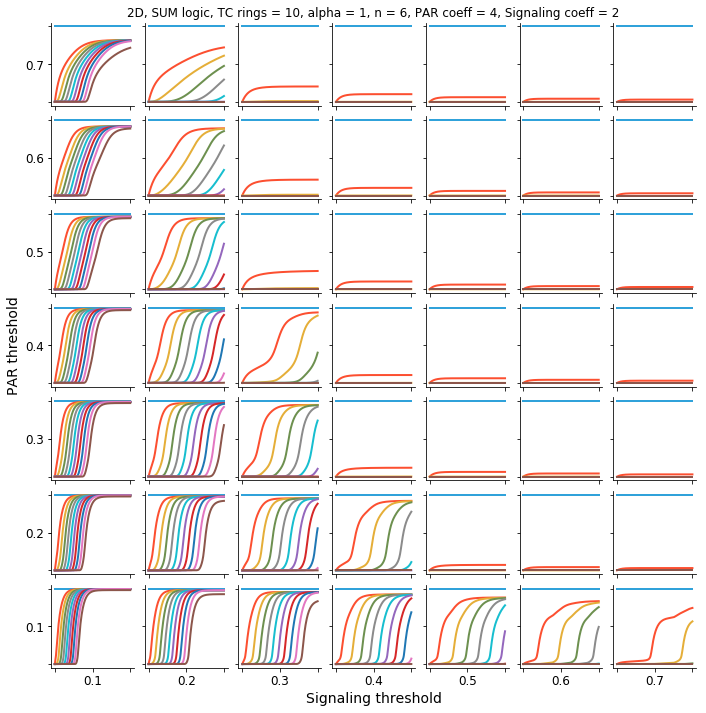

In [59]:
gridspace = hv.GridSpace(
    curve_dict_2D, kdims=["Signaling threshold", "PAR threshold"]
).opts(
    fig_inches=8,
    fontsize=dict(labels=14, ticks=12),
    title=f"2D, {logic} logic, TC rings = {R}, alpha = {alpha}, n = {n}, PAR coeff = {p_r}, Signaling coeff = {p_s}",
)
hv.output(gridspace)

__NOTE:__ Increasing the number of neighbors would have the same effect as increasing the signaling threshold.

So far, we have not really seen spatial attenuation in this system. But in what ways does this system show the potential for attenuation?
- If the number of neighbors increases over time, that would have a similar effect to increasing the threshold for signaling. In a certain range of alpha and signaling threshold (close to the propagation boundary), this would cause propagation to attenuate at a particular time. The higher the ultrasensitivity of signaling, the sharper this cutoff is!
- You could achieve a similar effect by having the signaling threshold itself increase over space
- For certain parameter ranges, there is a range of ultrasensitivity values for which the first transceiver activates but none of the subsequent do. This is not necessarily novel. This was seen in the linear system as well, where it could be shown that you can generate spatial attenuation in some narrow parameter range. Perhaps there is a similar phenomenon here.

<hr>

__Below I repeat all the previous runs for OR logic__

<hr>

In [61]:
def plot_axis_curve(k_s, k_r, more_params):
    # Re-pack params
    R, alpha, n, p_s, p_r, logic, steps, dt, I_0 = more_params
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plt = hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
#         title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False)
    
    return plt

# Set system parameters
R = 10
alpha = 1
n = 6
p_s = 2
p_r = 2
logic="OR"
I_0 = 1

# Run simulations and plot results
more_params = R, alpha, n, p_s, p_r, logic, steps, dt, I_0

k_s_vals = np.linspace(0.1, 0.7, 7)
k_r_vals = np.linspace(0.1, 0.7, 7)

curve_dict_2D = {
    (ks, kr): plot_axis_curve(ks, kr, more_params)
    for ks in k_s_vals
    for kr in k_r_vals
}

:GridSpace   [Signaling threshold,PAR threshold]
   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
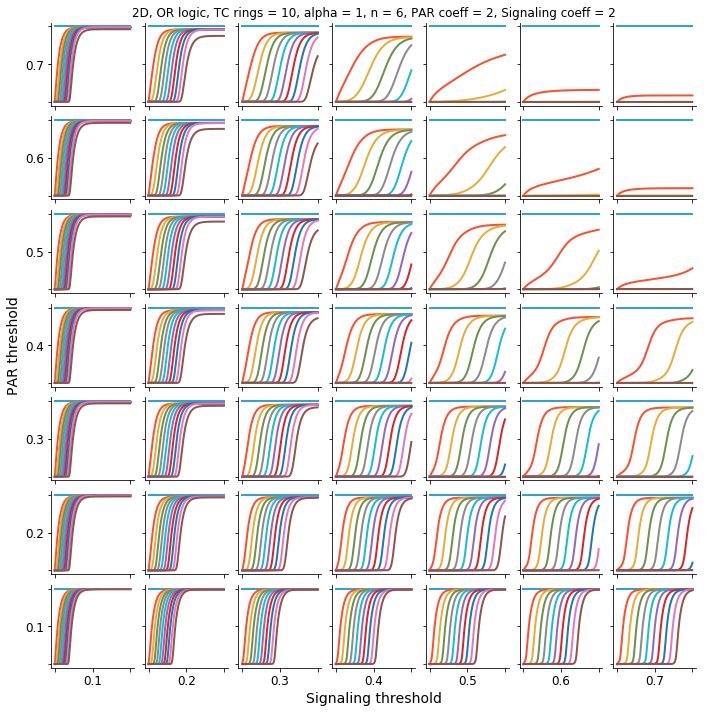

In [62]:
gridspace = hv.GridSpace(
    curve_dict_2D, kdims=["Signaling threshold", "PAR threshold"]
).opts(
    fig_inches=8,
    fontsize=dict(labels=14, ticks=12),
    title=f"2D, {logic} logic, TC rings = {R}, alpha = {alpha}, n = {n}, PAR coeff = {p_r}, Signaling coeff = {p_s}",
)
hv.output(gridspace)

In [63]:
def plot_axis_curve(k_s, k_r, more_params):
    # Re-pack params
    R, alpha, n, p_s, p_r, logic, steps, dt, I_0 = more_params
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plt = hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
#         title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False)
    
    return plt

# Set system parameters
R = 10
alpha = 1.5
n = 6
p_s = 2
p_r = 2
logic="OR"
I_0 = 1

# Run simulations and plot results
more_params = R, alpha, n, p_s, p_r, logic, steps, dt, I_0

k_s_vals = np.linspace(0.1, 0.7, 7)
k_r_vals = np.linspace(0.1, 0.7, 7)

curve_dict_2D = {
    (ks, kr): plot_axis_curve(ks, kr, more_params)
    for ks in k_s_vals
    for kr in k_r_vals
}

:GridSpace   [Signaling threshold,PAR threshold]
   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
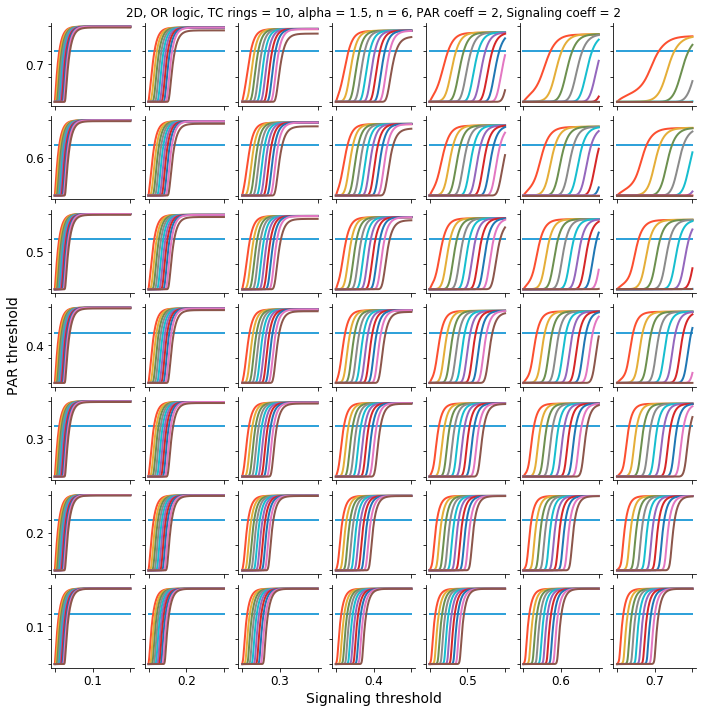

In [64]:
gridspace = hv.GridSpace(
    curve_dict_2D, kdims=["Signaling threshold", "PAR threshold"]
).opts(
    fig_inches=8,
    fontsize=dict(labels=14, ticks=12),
    title=f"2D, {logic} logic, TC rings = {R}, alpha = {alpha}, n = {n}, PAR coeff = {p_r}, Signaling coeff = {p_s}",
)
hv.output(gridspace)

In [67]:
def plot_axis_curve(k_s, k_r, more_params):
    # Re-pack params
    R, alpha, n, p_s, p_r, logic, steps, dt, I_0 = more_params
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plt = hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
#         title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False)
    
    return plt

# Set system parameters
R = 10
alpha = 0.5
n = 6
p_s = 2
p_r = 2
logic="OR"
I_0 = 1

# Run simulations and plot results
more_params = R, alpha, n, p_s, p_r, logic, steps, dt, I_0

k_s_vals = np.linspace(0.1, 0.7, 7)
k_r_vals = np.linspace(0.1, 0.7, 7)

curve_dict_2D = {
    (ks, kr): plot_axis_curve(ks, kr, more_params)
    for ks in k_s_vals
    for kr in k_r_vals
}

:GridSpace   [Signaling threshold,PAR threshold]
   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
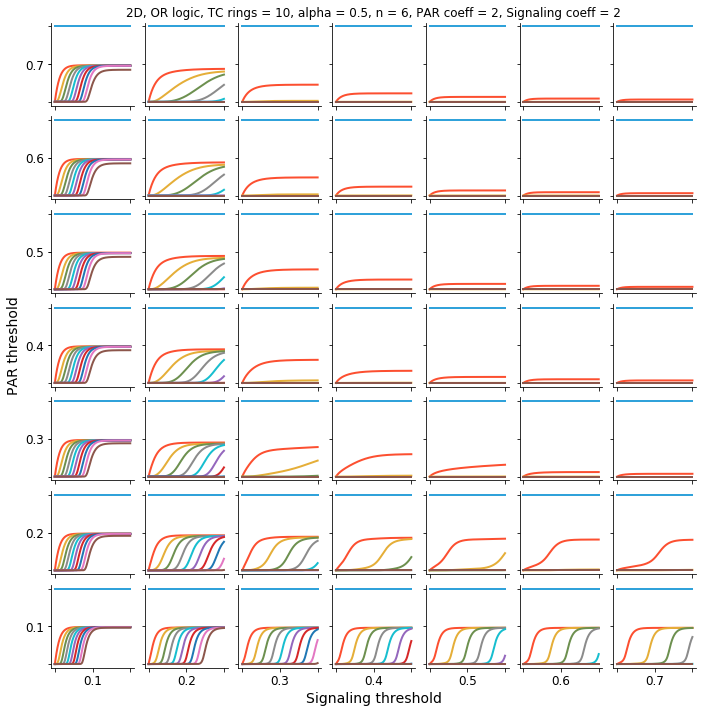

In [68]:
gridspace = hv.GridSpace(
    curve_dict_2D, kdims=["Signaling threshold", "PAR threshold"]
).opts(
    fig_inches=8,
    fontsize=dict(labels=14, ticks=12),
    title=f"2D, {logic} logic, TC rings = {R}, alpha = {alpha}, n = {n}, PAR coeff = {p_r}, Signaling coeff = {p_s}",
)
hv.output(gridspace)

In [69]:
def plot_axis_curve(k_s, k_r, more_params):
    # Re-pack params
    R, alpha, n, p_s, p_r, logic, steps, dt, I_0 = more_params
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plt = hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
#         title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False)
    
    return plt

# Set system parameters
R = 10
alpha = 1
n = 6
p_s = 4
p_r = 4
logic="OR"
I_0 = 1

# Run simulations and plot results
more_params = R, alpha, n, p_s, p_r, logic, steps, dt, I_0

k_s_vals = np.linspace(0.1, 0.7, 7)
k_r_vals = np.linspace(0.1, 0.7, 7)

curve_dict_2D = {
    (ks, kr): plot_axis_curve(ks, kr, more_params)
    for ks in k_s_vals
    for kr in k_r_vals
}

:GridSpace   [Signaling threshold,PAR threshold]
   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
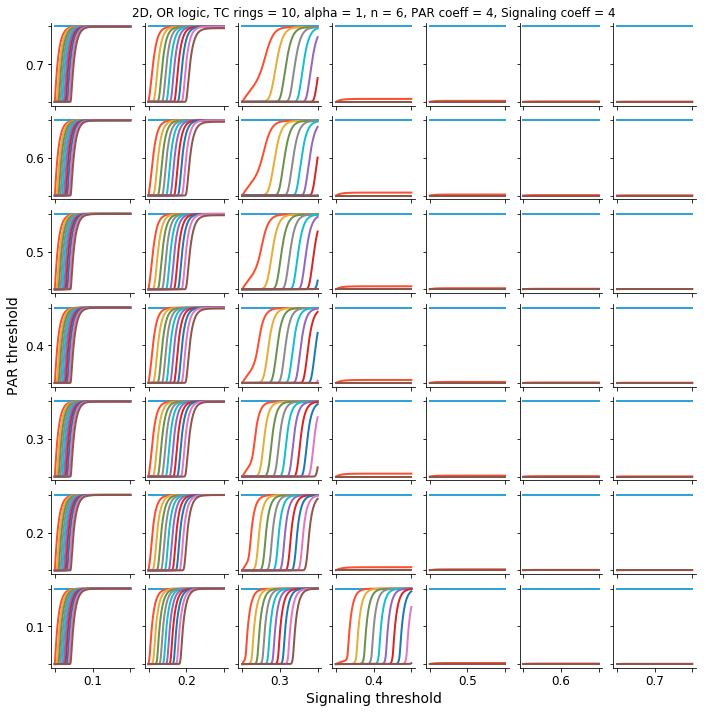

In [70]:
gridspace = hv.GridSpace(
    curve_dict_2D, kdims=["Signaling threshold", "PAR threshold"]
).opts(
    fig_inches=8,
    fontsize=dict(labels=14, ticks=12),
    title=f"2D, {logic} logic, TC rings = {R}, alpha = {alpha}, n = {n}, PAR coeff = {p_r}, Signaling coeff = {p_s}",
)
hv.output(gridspace)

In [71]:
def plot_axis_curve(k_s, k_r, more_params):
    # Re-pack params
    R, alpha, n, p_s, p_r, logic, steps, dt, I_0 = more_params
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plt = hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
#         title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False)
    
    return plt

# Set system parameters
R = 10
alpha = 1
n = 6
p_s = 4
p_r = 2
logic="OR"
I_0 = 1

# Run simulations and plot results
more_params = R, alpha, n, p_s, p_r, logic, steps, dt, I_0

k_s_vals = np.linspace(0.1, 0.7, 7)
k_r_vals = np.linspace(0.1, 0.7, 7)

curve_dict_2D = {
    (ks, kr): plot_axis_curve(ks, kr, more_params)
    for ks in k_s_vals
    for kr in k_r_vals
}

:GridSpace   [Signaling threshold,PAR threshold]
   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
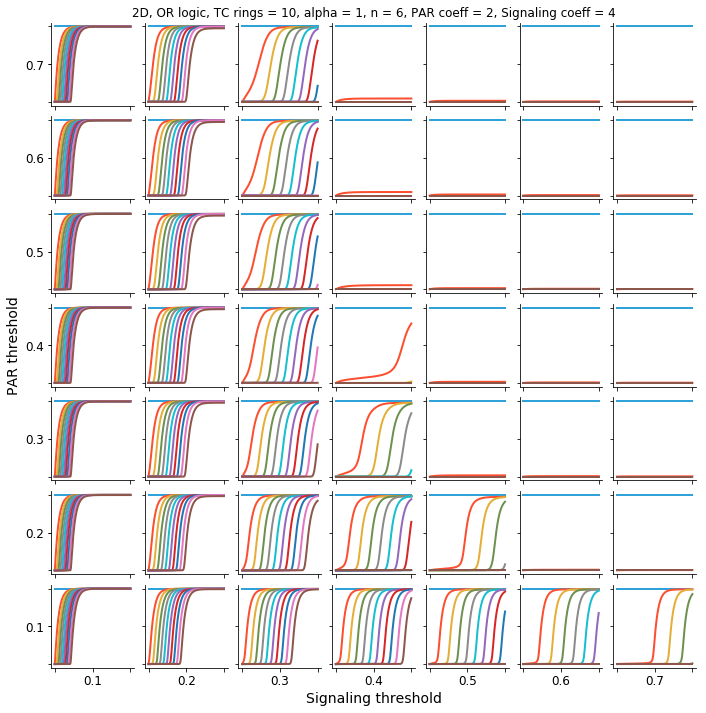

In [72]:
gridspace = hv.GridSpace(
    curve_dict_2D, kdims=["Signaling threshold", "PAR threshold"]
).opts(
    fig_inches=8,
    fontsize=dict(labels=14, ticks=12),
    title=f"2D, {logic} logic, TC rings = {R}, alpha = {alpha}, n = {n}, PAR coeff = {p_r}, Signaling coeff = {p_s}",
)
hv.output(gridspace)

In [73]:
def plot_axis_curve(k_s, k_r, more_params):
    # Re-pack params
    R, alpha, n, p_s, p_r, logic, steps, dt, I_0 = more_params
    params = alpha, n, k_s, p_s, k_r, p_r, logic
    
    ddf = lattice_signaling_sim_regular(
        R=R, steps=steps, dt=dt, params=params, update_fun=update_2D_nl_par, I_0=1
    )
    
    # Get cells on positive x-axis
    x_axis_where = np.logical_and(
        np.logical_and(ddf["X_coord"] >= 0, ddf["Y_coord"] == 0), ddf["cell_ix"] > 0
    )
    ddf_x_axis = ddf.loc[x_axis_where, :].reset_index(drop=True)
    
    plt = hv.Curve(
        data=ddf_x_axis,
        kdims=['time'],
        vdims=['Signal expression', 'cell', ],
    ).groupby(
        'cell'
    ).opts(
        padding=0.05,
#         title=f'2D induction w/ {logic} logic, R = {R}\n alpha/n={alpha}/{n}, k_s={k_s:.2f}, p_s={p_s:.1f}\nk_r = {k_r:.2f}, p_r = {p_r:.1f}'
    ).overlay().opts(show_legend=False)
    
    return plt

# Set system parameters
R = 10
alpha = 1
n = 6
p_s = 2
p_r = 4
logic="OR"
I_0 = 1

# Run simulations and plot results
more_params = R, alpha, n, p_s, p_r, logic, steps, dt, I_0

k_s_vals = np.linspace(0.1, 0.7, 7)
k_r_vals = np.linspace(0.1, 0.7, 7)

curve_dict_2D = {
    (ks, kr): plot_axis_curve(ks, kr, more_params)
    for ks in k_s_vals
    for kr in k_r_vals
}

:GridSpace   [Signaling threshold,PAR threshold]
   :NdOverlay   [cell]
      :Curve   [time]   (Signal expression,cell)
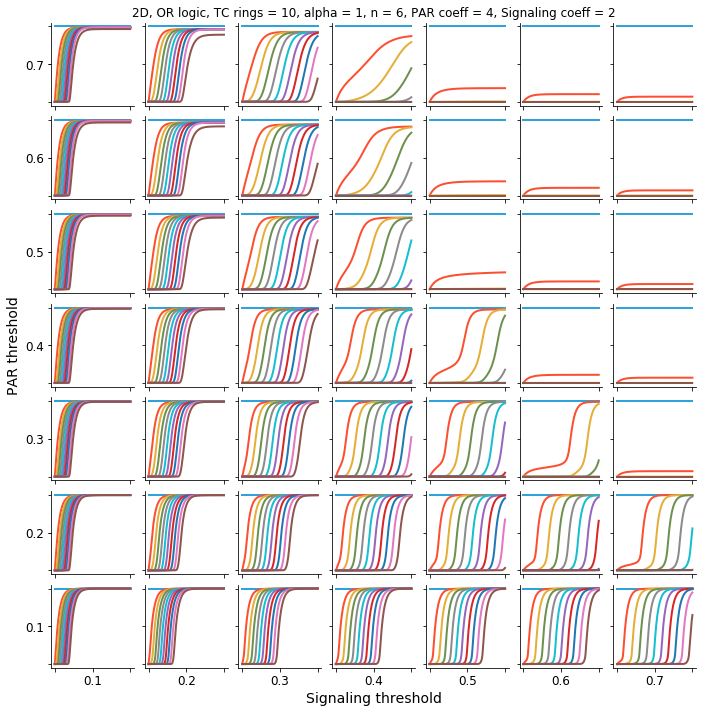

In [74]:
gridspace = hv.GridSpace(
    curve_dict_2D, kdims=["Signaling threshold", "PAR threshold"]
).opts(
    fig_inches=8,
    fontsize=dict(labels=14, ticks=12),
    title=f"2D, {logic} logic, TC rings = {R}, alpha = {alpha}, n = {n}, PAR coeff = {p_r}, Signaling coeff = {p_s}",
)
hv.output(gridspace)

OR logic doesn't seem to have a 2- or 3-ring steady-state, only propagation or no propagation. 

<hr>

## Videos

Below I make videos demonstrating certain dynamical behaviors of this model

<hr>

In [4]:
def lattice_signaling_sim_variable_n(
    R,
    steps,
    dt,
    params,
    update_fun,
    n_range,
    rho=1.01,
    I_0=None, 
    S_init=None,
    *args,
    **kwargs
):
    """Returns a DataFrame of simulated lateral signaling on a regular lattice of cells."""
    X = hex_grid_circle(R)
    N = X.shape[0] - 1
    A = sp.distance.squareform(sp.distance.pdist(X) < rho) + 0
    
    # Get initial expression vector if init_S not specified
    if S_init is None:
        assert(I_0 is not None), """If no S_init is specified, I_0 must be specified."""
        S_init = np.array((I_0, I_0) + (0,) * N)
    
    # Initialize expression
    S, df, cell_names, digits = initialize_lattice_sim_regular(S_init)
    df["n"] = n_range[0]
    ls = [df]
    
    # Add a row and column to A for the amount of inducer I
    A = np.vstack((np.zeros((1, N + 2)), np.hstack((np.zeros((N + 1, 1)), A))))
    
    # Unpack params
    alpha, k_s, p_s, k_r, p_r, logic = params
    
    for step, n in zip(np.arange(steps), n_range):
        #Re-pack params
        params = alpha, n, k_s, p_s, k_r, p_r, logic
        
        # Run update
        S = update_fun(S, A, dt, params)
        
        # Append to data list
        df = pd.DataFrame(
            {
                "cell": cell_names,
                "Signal expression": S,
                "step": step + 1,
                "cell_ix": np.arange(N + 2),
                "n": n,
            }
        )
        ls.append(df)
    
    # Construct output DataFrame
    df = pd.concat(ls)
    df["step"] = [int(x) for x in df["step"]]
    df["time"] = df["step"] * dt
    
    locs = np.concatenate((((0, 0),), X))
    df['X_coord'] = [locs[int(ix), 0] for ix in df['cell_ix'].values]
    df['Y_coord'] = [locs[int(ix), 1] for ix in df['cell_ix'].values]
    
    return df


In [5]:
# Format plot titles
title = "time = {0:.2f}, n = {1:.2f}"
def title_format (step_data, step, dt, **kwargs):
    return (dt * step, step_data["n"][0])

In [6]:
# Set system parameters
R = 10
alpha = 1
k_s = 0.2
k_r = 0.3
p_r = 2
logic = "SUM"

# Set sim parameters
steps = 300
dt = 0.1
n_low, n_high = 6, 9
sat_step = 75
n_range = np.concatenate((np.linspace(n_low, n_high, sat_step), n_high * np.ones(steps - sat_step)))

In [132]:
# Run simulation for each video
p_s = 2
params = alpha, k_s, p_s, k_r, p_r, logic
df1 = lattice_signaling_sim_variable_n(
    R=R, steps=steps, dt=dt, params=params, n_range=n_range, update_fun=update_2D_nl_par, I_0=1
)

In [133]:
from math import floor
hmap = lattice_vid_mp4(df1, R=R, dt=dt, title=title, title_format=title_format)
hv.save(
    hmap,
    "2020-05-04_2D_nlPAR" 
    + "_ks" + str(k_s)
    + "_kr" + str(k_r)
    + "_pr" + str(p_r)
    + "_n" + str(floor(n_range[0])) + "-" + str(floor(n_range[-1]))
    + "_ps2.mp4",
    fps=30,
)

In [134]:
p_s = 4
params = alpha, k_s, p_s, k_r, p_r, logic
df2 = lattice_signaling_sim_variable_n(
    R=R, steps=steps, dt=dt, params=params, n_range=n_range, update_fun=update_2D_nl_par, I_0=1
)

In [135]:
from math import floor
hmap = lattice_vid_mp4(
    df2, R=R, dt=dt, title="time = {0:.2f}, n = {1:.2f}", title_format=title_format
)
hv.save(
    hmap,
    "2020-05-04_2D_nlPAR" 
    + "_ks" + str(k_s)
    + "_kr" + str(k_r)
    + "_pr" + str(p_r)
    + "_n" + str(floor(n_range[0])) + "-" + str(floor(n_range[-1]))
    + "_ps4.mp4",
    fps=30,
)

In [136]:
n_low, n_high = 6, 12
sat_step = 75
n_range = np.concatenate((np.linspace(n_low, n_high, sat_step), n_high * np.ones(steps - sat_step)))

In [137]:
# Run simulation for each video
p_s = 2
params = alpha, k_s, p_s, k_r, p_r, logic
df1 = lattice_signaling_sim_variable_n(
    R=R, steps=steps, dt=dt, params=params, n_range=n_range, update_fun=update_2D_nl_par, I_0=1
)

In [138]:
from math import floor
hmap = lattice_vid_mp4(df1, R=R, dt=dt, title=title, title_format=title_format)
hv.save(
    hmap,
    "2020-05-04_2D_nlPAR" 
    + "_ks" + str(k_s)
    + "_kr" + str(k_r)
    + "_pr" + str(p_r)
    + "_n" + str(floor(n_range[0])) + "-" + str(floor(n_range[-1]))
    + "_ps2.mp4",
    fps=30,
)

In [139]:
p_s = 4
params = alpha, k_s, p_s, k_r, p_r, logic
df2 = lattice_signaling_sim_variable_n(
    R=R, steps=steps, dt=dt, params=params, n_range=n_range, update_fun=update_2D_nl_par, I_0=1
)

In [140]:
from math import floor
hmap = lattice_vid_mp4(
    df2, R=R, dt=dt, title="time = {0:.2f}, n = {1:.2f}", title_format=title_format
)
hv.save(
    hmap,
    "2020-05-04_2D_nlPAR" 
    + "_ks" + str(k_s)
    + "_kr" + str(k_r)
    + "_pr" + str(p_r)
    + "_n" + str(floor(n_range[0])) + "-" + str(floor(n_range[-1]))
    + "_ps4.mp4",
    fps=30,
)

In all the above runs, the increased neighbors and Hill coefficients slow the propagation wave, but they never stop it! That is wild - the PAR circuit is very hard to stop once it starts I guess. Let's now do our best to get it to stop.

In [141]:
n_low, n_high = 6, 18
sat_step = 75
n_range = np.concatenate((np.linspace(n_low, n_high, sat_step), n_high * np.ones(steps - sat_step)))

In [142]:
# Run simulation for each video
p_s = 2
params = alpha, k_s, p_s, k_r, p_r, logic
df1 = lattice_signaling_sim_variable_n(
    R=R, steps=steps, dt=dt, params=params, n_range=n_range, update_fun=update_2D_nl_par, I_0=1
)

In [143]:
from math import floor
hmap = lattice_vid_mp4(df1, R=R, dt=dt, title=title, title_format=title_format)
hv.save(
    hmap,
    "2020-05-04_2D_nlPAR" 
    + "_ks" + str(k_s)
    + "_kr" + str(k_r)
    + "_pr" + str(p_r)
    + "_n" + str(n_low) + "-" + str(n_high)
    + "_ps2.mp4",
    fps=30,
)

In [144]:
p_s = 4
params = alpha, k_s, p_s, k_r, p_r, logic
df2 = lattice_signaling_sim_variable_n(
    R=R, steps=steps, dt=dt, params=params, n_range=n_range, update_fun=update_2D_nl_par, I_0=1
)

In [145]:
from math import floor
hmap = lattice_vid_mp4(
    df2, R=R, dt=dt, title="time = {0:.2f}, n = {1:.2f}", title_format=title_format
)
hv.save(
    hmap,
    "2020-05-04_2D_nlPAR" 
    + "_ks" + str(k_s)
    + "_kr" + str(k_r)
    + "_pr" + str(p_r)
    + "_n" + str(floor(n_range[0])) + "-" + str(floor(n_range[-1]))
    + "_ps4.mp4",
    fps=30,
)

One more for fun

In [152]:
k_s = 0.15
n_low, n_high = 18, 18
sat_step = 75
n_range = np.concatenate((np.linspace(n_low, n_high, sat_step), n_high * np.ones(steps - sat_step)))

In [153]:
# Run simulation for each video
p_s = 4
params = alpha, k_s, p_s, k_r, p_r, logic
df1 = lattice_signaling_sim_variable_n(
    R=R, steps=steps, dt=dt, params=params, n_range=n_range, update_fun=update_2D_nl_par, I_0=1
)

In [154]:
from math import floor
hmap = lattice_vid_mp4(df1, R=R, dt=dt, title=title, title_format=title_format)
hv.save(
    hmap,
    "2020-05-04_2D_nlPAR" 
    + "_ks" + str(k_s)
    + "_kr" + str(k_r)
    + "_pr" + str(p_r)
    + "_n" + str(n_low) + "-" + str(n_high)
    + "_ps4.mp4",
    fps=30,
)

<hr>

Repeat the above for OR logic

In [48]:
# Set system parameters
R = 10
alpha = 1
k_s = 0.5
k_r = 0.3
p_r = 2
logic = "OR"

# Set sim parameters
steps = 300
dt = 0.1
n_low, n_high = 6, 9
sat_step = 75
n_range = np.concatenate((np.linspace(n_low, n_high, sat_step), n_high * np.ones(steps - sat_step)))

In [49]:
# Run simulation for each video
p_s = 2
params = alpha, k_s, p_s, k_r, p_r, logic
df1 = lattice_signaling_sim_variable_n(
    R=R, steps=steps, dt=dt, params=params, n_range=n_range, update_fun=update_2D_nl_par, I_0=1
)

from math import floor
hmap = lattice_vid_mp4(df1, R=R, dt=dt, title=title, title_format=title_format)
hv.save(
    hmap,
    "2020-05-08_2D_nlPAR" 
    + "_ks" + str(k_s)
    + "_kr" + str(k_r)
    + "_pr" + str(p_r)
    + "_n" + str(floor(n_range[0])) + "-" + str(floor(n_range[-1]))
    + "_" + logic
    + "_ps" + str(p_s)
    + ".mp4",
    fps=30,
)

In [50]:
p_s = 3
params = alpha, k_s, p_s, k_r, p_r, logic
df2 = lattice_signaling_sim_variable_n(
    R=R, steps=steps, dt=dt, params=params, n_range=n_range, update_fun=update_2D_nl_par, I_0=1
)

from math import floor
hmap = lattice_vid_mp4(
    df2, R=R, dt=dt, title="time = {0:.2f}, n = {1:.2f}", title_format=title_format
)
hv.save(
    hmap,
    "2020-05-04_2D_nlPAR" 
    + "_ks" + str(k_s)
    + "_kr" + str(k_r)
    + "_pr" + str(p_r)
    + "_n" + str(floor(n_range[0])) + "-" + str(floor(n_range[-1]))
    + "_" + logic
    + "_ps" + str(p_s)
    + ".mp4",
    fps=30,
)

In [51]:
n_low, n_high = 6, 12
sat_step = 75
n_range = np.concatenate((np.linspace(n_low, n_high, sat_step), n_high * np.ones(steps - sat_step)))

In [52]:
# Run simulation for each video
p_s = 2
params = alpha, k_s, p_s, k_r, p_r, logic
df1 = lattice_signaling_sim_variable_n(
    R=R, steps=steps, dt=dt, params=params, n_range=n_range, update_fun=update_2D_nl_par, I_0=1
)

from math import floor
hmap = lattice_vid_mp4(df1, R=R, dt=dt, title=title, title_format=title_format)
hv.save(
    hmap,
    "2020-05-08_2D_nlPAR" 
    + "_ks" + str(k_s)
    + "_kr" + str(k_r)
    + "_pr" + str(p_r)
    + "_n" + str(floor(n_range[0])) + "-" + str(floor(n_range[-1]))
    + "_" + logic
    + "_ps" + str(p_s)
    + ".mp4",
    fps=30,
)

In [53]:
p_s = 2.5
params = alpha, k_s, p_s, k_r, p_r, logic
df2 = lattice_signaling_sim_variable_n(
    R=R, steps=steps, dt=dt, params=params, n_range=n_range, update_fun=update_2D_nl_par, I_0=1
)

from math import floor
hmap = lattice_vid_mp4(
    df2, R=R, dt=dt, title="time = {0:.2f}, n = {1:.2f}", title_format=title_format
)
hv.save(
    hmap,
    "2020-05-04_2D_nlPAR" 
    + "_ks" + str(k_s)
    + "_kr" + str(k_r)
    + "_pr" + str(p_r)
    + "_n" + str(floor(n_range[0])) + "-" + str(floor(n_range[-1]))
    + "_" + logic
    + "_ps" + str(p_s)
    + ".mp4",
    fps=30,
)